In [ ]:
#-------------------------------   <<<1번 문제>>>   ----------------------------------------------------------------

#------------------------------------------------------------------------------------------------------------------

In [ ]:
import pandas as pd
mba_sal = pd.read_csv("NBA_season1718_salary.csv")

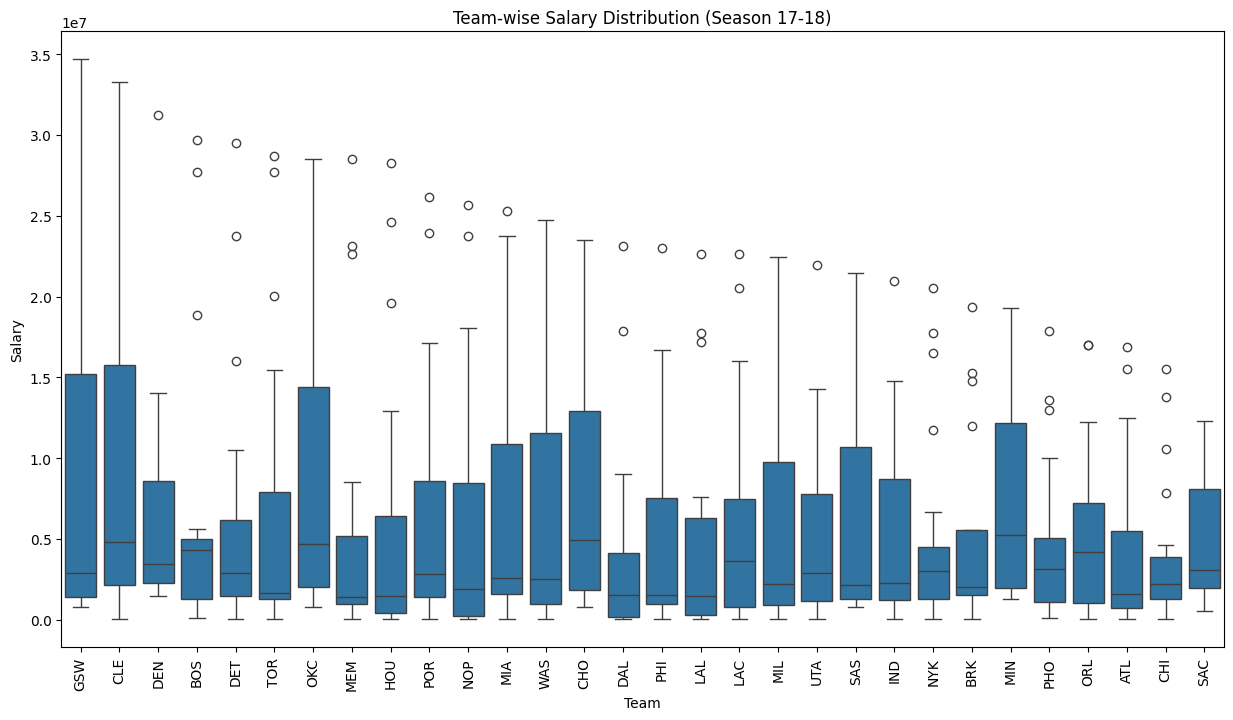

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.boxplot(x='Tm', y='season17_18', data=mba_sal)
plt.xticks(rotation=90)
plt.title('Team-wise Salary Distribution (Season 17-18)')
plt.xlabel('Team')
plt.ylabel('Salary')
plt.show()
#팀별로 연봉이 어떻게 분포되는지 확인

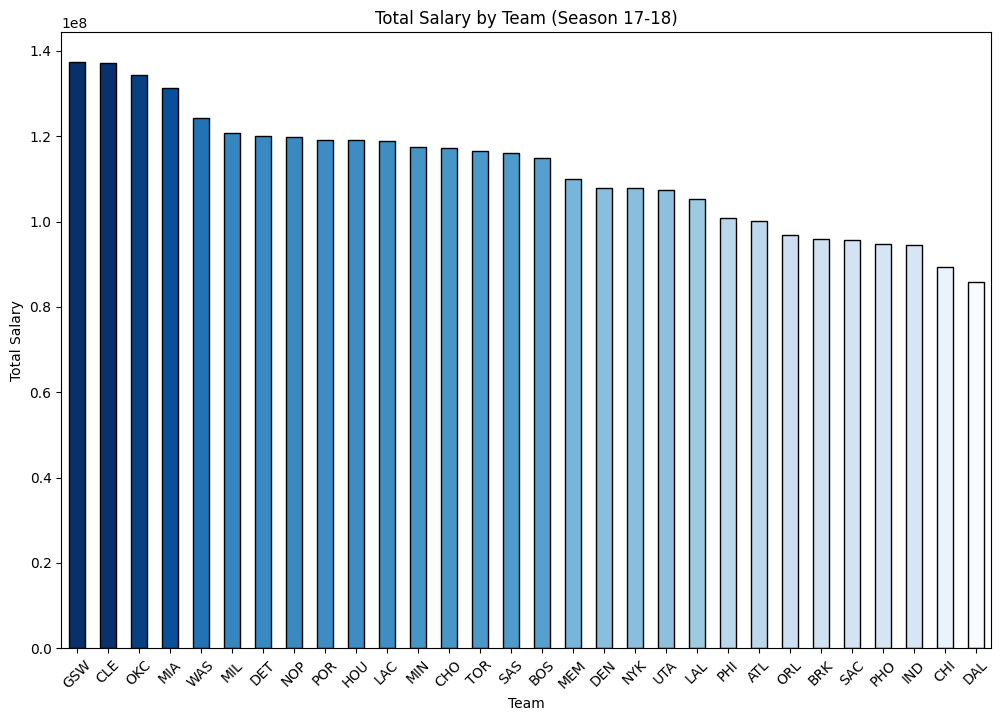

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm


groupsal = mba_sal.groupby('Tm')['season17_18'].sum()

 
groupsal = groupsal.sort_values(ascending=False)

# 색상 설정을 위한 정규화 및 색상 매핑
norm = plt.Normalize(groupsal.min(), groupsal.max())
colors = cm.Blues(norm(groupsal.values))

# 막대그래프 시각화
plt.figure(figsize=(12, 8))
groupsal.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Total Salary by Team (Season 17-18)')
plt.xlabel('Team')
plt.ylabel('Total Salary')
plt.xticks(rotation=45)
plt.show()
#팀별 연봉 순위 확인

In [ ]:
#-------------------------------   <<<2번 문제>>>   ----------------------------------------------------------------





#------------------------------------------------------------------------------------------------------------------

In [76]:
mba_season = pd.read_csv("Seasons_Stats.csv")
mba_season.tail()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0
24690,24690,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,...,0.653,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0


In [ ]:
mba_player = pd.read_csv("player_data.csv")
mba_player.head()

In [79]:
mba_season1718=mba_season[mba_season["Year"].isin([2017])] # 선수들 모으기

In [81]:
merge_mba = pd.merge(mba_season1718, mba_sal, on=['Player', 'Tm'], how='inner')

In [39]:
sal_1718=merge_mba[['Year','Player', 'Pos', 'Tm', 'season17_18']]
sal_1718 #필요 컬럼만 보으기

,Year,Player,Pos,Tm,season17_18
0,2017.0,Alex Abrines,SG,OKC,5725000.0
1,2017.0,Quincy Acy,PF,BRK,1709538.0
2,2017.0,Steven Adams,C,OKC,22471910.0
3,2017.0,Arron Afflalo,SG,SAC,1500000.0
4,2017.0,Alexis Ajinca,C,NOP,4961798.0
...,...,...,...,...,...
265,2017.0,Joe Young,PG,IND,1471382.0
266,2017.0,Thaddeus Young,PF,IND,14796348.0
267,2017.0,Cody Zeller,PF,CHO,12584270.0
268,2017.0,Paul Zipser,SF,CHI,1312611.0


In [42]:
# 포지션별 평균 salary 계산
position_salary_mean = merge_mba.groupby('Pos')['season17_18'].mean().sort_values(ascending=False)
print(round(position_salary_mean,2))


Pos
C     8845450.98
SF    8108065.47
PG    8016726.73
PF    7269190.37
SG    6873737.60
Name: season17_18, dtype: float64


In [49]:
from scipy import stats

# 포지션별 salary 리스트 생성
positions = merge_mba['Pos'].unique()
salary_by_position = [merge_mba[merge_mba['Pos'] == pos]['season17_18'] for pos in positions]
# ANOVA 분석
anova_result = stats.f_oneway(*salary_by_position)
print(f"ANOVA F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")
# 유의미 하지 않음 - 결론

ANOVA F-statistic: 0.5387193894551657, p-value: 0.7074148091788368


In [ ]:
#-------------------------------   <<<3번 문제>>>   ----------------------------------------------------------------






#------------------------------------------------------------------------------------------------------------------

In [87]:
mba_season = pd.read_csv("Seasons_Stats.csv")
mba_season = mba_season[mba_season['Year'].isin([2014, 2015, 2016, 2017])] # 2014~2017 데이터 모으기

In [63]:
mba_season = mba_season.dropna(subset=['PER'],axis=0,inplace=False)
mba_season["PER"].isna().sum() #결측값 없음 확인!

0

In [84]:
Perdata = pd.DataFrame(mba_season.groupby('Player')['PER'].mean().reset_index())
Perdata # 선수별 PER

,Player,PER
0,A.C. Green,13.872222
1,A.J. Bramlett,-0.400000
2,A.J. English,11.550000
3,A.J. Guyton,4.366667
4,A.J. Hammons,8.400000
...,...,...
3916,Zelmo Beaty*,16.462500
3917,Zendon Hamilton,13.400000
3918,Zoran Dragic,8.433333
3919,Zoran Planinic,9.800000


In [82]:
mba_sal = pd.read_csv("NBA_season1718_salary.csv")


In [55]:
mergedata2 = pd.merge(Perdata,mba_sal,on='Player', how='inner')
mergedata2

,Player,PER,Unnamed: 0,Tm,season17_18
0,A.J. Hammons,8.400000,411,MIA,1312611.0
1,Aaron Brooks,12.166667,319,MIN,2116955.0
2,Aaron Gordon,14.266667,190,ORL,5504420.0
3,Aaron Gray,7.133333,492,DET,452059.0
4,Al Horford,20.125000,11,BOS,27734405.0
...,...,...,...,...,...
469,Wilson Chandler,13.500000,101,DEN,12016854.0
470,Yogi Ferrell,11.233333,429,DAL,1312611.0
471,Zach LaVine,13.400000,251,CHI,3202217.0
472,Zach Randolph,18.650000,98,SAC,12307692.0


In [56]:
myanser = mergedata2[['PER', 'season17_18']].corr()
myanser

,PER,season17_18
PER,1.000000,0.464479
season17_18,0.464479,1.000000
